In [1]:
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=5b4e870d588c522a139e570fa8bdba86e2b4aa4fb24d1905c6a2b91c8c743760
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [2]:
import wikipedia
# import wikipediaapi 
import datetime
import pandas as pd
import numpy as np
from sklearn import feature_extraction
from sklearn import model_selection
import nltk
from nltk import tokenize
from nltk import word_tokenize, pos_tag
import string
from keras.preprocessing.text import Tokenizer
from sklearn import svm
from sklearn import multiclass
from sklearn import metrics
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.layers import Embedding, Conv1D, MaxPool1D, GlobalMaxPool1D, Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import utils

In [3]:
classes = ['sport', 'economy', 'politics', 'health', 'tourism', 
           'entertainment', 'culture', 'music', 'education', 
           'real estate', 'nutrition', 'science', 'history', 'technology'
          ]

In [4]:
def generate_data(classes, n):
    data = [];
    for i in classes:
#         topics = wikipedia.search(i, results = n)
#         for j in topics:
#         print(classes)
#         print("Class: ", i)
        for j in list(wikipedia.search(i,results = n)):
            wiki_wiki = wikipediaapi.Wikipedia('en')
            page_py = wiki_wiki.page(j)
            if(page_py.exists()):
#                 print("Class: ", i)
#                 print("Title: ", j)
#                     print("Section: ", page_py.sections[0].title)
#                     print("Text: ", page_py.text)
                for k in page_py.categories:
                    if i in k.lower(): 
#                         print("Class: ", i)
                        data.append((i, page_py.summary))
                        break
            else:
                continue
    return data

In [5]:
# data = generate_data(classes, 10)

In [6]:
# for i in classes:
#     c = 0
#     for j in range(0, len(data)):
#         if(data[j][0] == i):
#             c = c + 1
#     print("%s %d" %(i, c))

In [7]:
def create_data_csv_file(name, data):
    name = name + '.csv'
#         '_' + str(datetime.datetime.now()).replace(' ', '_').replace('.', '-').replace(':', '-') + 
#         '.csv'
    sep = '<>'
    cols = 'class' + sep + 'text\n'
    with open(name, 'w+', encoding='utf-8') as file:
        file.write(cols)
#         YELLOW,SMALL,STRETCH,ADULT,T
        for i in range(0, len(data)):
            line = data[i][0] + sep + data[i][1].replace('\n', ' ')

            file.write(line)
            file.write('\n')
    file.close()
            
#     print(text)

In [8]:
# create_data_csv_file('data_10', data)

In [9]:
df = pd.read_csv('data_300.csv', sep = '<>')
df

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,class,text
0,sport,Sport pertains to any form of competitive phys...
1,sport,Sport was an American sports magazine. Launche...
2,sport,"Sport, Sport, Sport (Russian: Спорт, спорт, сп..."
3,sport,Athletics is a group of sporting events that i...
4,sport,Squash is a racket and ball sport played by tw...
...,...,...
3907,technology,Queensland University of Technology (QUT) is a...
3908,technology,Technology education is the study of technolog...
3909,technology,"In business theory, disruptive innovation is i..."
3910,technology,Software Technology Parks of India (STPI) is a...


In [10]:
df['class'].value_counts()

music            431
history          399
sport            393
education        363
culture          333
health           281
politics         274
economy          266
tourism          250
science          240
technology       200
entertainment    194
real estate      177
nutrition        111
Name: class, dtype: int64

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
dict_class_index = {
    class_name: i for i, class_name in enumerate(df['class'].unique())
}

df['class num'] = df['class'].map(dict_class_index)

In [13]:
df

,class,text,class num
0,sport,Sport pertains to any form of competitive phys...,0
1,sport,Sport was an American sports magazine. Launche...,0
2,sport,"Sport, Sport, Sport (Russian: Спорт, спорт, сп...",0
3,sport,Athletics is a group of sporting events that i...,0
4,sport,Squash is a racket and ball sport played by tw...,0
...,...,...,...
3907,technology,Queensland University of Technology (QUT) is a...,13
3908,technology,Technology education is the study of technolog...,13
3909,technology,"In business theory, disruptive innovation is i...",13
3910,technology,Software Technology Parks of India (STPI) is a...,13


In [14]:
dict_class_index

{'sport': 0,
 'economy': 1,
 'politics': 2,
 'health': 3,
 'tourism': 4,
 'entertainment': 5,
 'culture': 6,
 'music': 7,
 'education': 8,
 'real estate': 9,
 'nutrition': 10,
 'science': 11,
 'history': 12,
 'technology': 13}

In [15]:
!pip install advertools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 309 kB 8.2 MB/s 
     |████████████████████████████████| 264 kB 61.2 MB/s 
     |████████████████████████████████| 55 kB 4.4 MB/s 
     |████████████████████████████████| 251 kB 46.8 MB/s 
     |████████████████████████████████| 3.1 MB 48.2 MB/s 
     |████████████████████████████████| 93 kB 2.2 MB/s 
     |████████████████████████████████| 4.0 MB 11.5 MB/s 
     |████████████████████████████████| 74 kB 1.7 MB/s 
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.6-py3-none-any.whl size=11958 sha256=fe2e71e4939b0cbc8b7d47a1cac31c4c417dc3450162590c226243088679cd94
  Stored in directory: /root/.cache/pip/wheels/c9/d6/6a/de198d890277cde60ca3dbebe7ae592d3b381c7d9bb2455f4d
Successfully built PyDispatcher


In [16]:
import advertools as adv
stop_words = sorted(adv.stopwords['english'])
print(stop_words)

['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'have', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon

In [17]:
def clear_text(text):
    new_text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words])).str.lower()
    new_text = new_text.replace(r'[^\w\s]+', '', regex=True)
    return new_text

In [18]:
new_text = clear_text(df['text'])

In [19]:
df['clear text'] = new_text
df

,class,text,class num,clear text
0,sport,Sport pertains to any form of competitive phys...,0,sport pertains form competitive physical activ...
1,sport,Sport was an American sports magazine. Launche...,0,sport american sports magazine launched septem...
2,sport,"Sport, Sport, Sport (Russian: Спорт, спорт, сп...",0,sport sport sport russian спорт спорт спорт 19...
3,sport,Athletics is a group of sporting events that i...,0,athletics group sporting events involves compe...
4,sport,Squash is a racket and ball sport played by tw...,0,squash racket ball sport played players fourwa...
...,...,...,...,...
3907,technology,Queensland University of Technology (QUT) is a...,13,queensland university technology qut public re...
3908,technology,Technology education is the study of technolog...,13,technology education study technology students...
3909,technology,"In business theory, disruptive innovation is i...",13,in business theory disruptive innovation innov...
3910,technology,Software Technology Parks of India (STPI) is a...,13,software technology parks india stpi premier s...


In [20]:
newest_text = []
for i in range(0, len(df)):
    newest_text.append(word_tokenize(df['clear text'][i]))

In [21]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [22]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [23]:
def my_lemmitezer(text):
    return pos_tag(word_tokenize(text))

In [24]:
tokenized_lemmitzed_text = []
for i in range(0, len(df)):
    tokenized_lemmitzed_text.append(my_lemmitezer(df['clear text'][i]))

In [25]:
df['tokenized lemmitzed text'] = tokenized_lemmitzed_text

In [26]:
stemmer = nltk.stem.PorterStemmer()

In [27]:
def my_stemmer(text):
    tokenized_stemmed_text = []
    tokens = word_tokenize(text)
    for token in tokens:
        tokenized_stemmed_text.append(stemmer.stem(token))
    return tokenized_stemmed_text

In [28]:
tokenized_stemmed_text = []
for i in range(0, len(df)):
    tokenized_stemmed_text.append(my_stemmer(df['clear text'][i]))

In [29]:
df['tokenized stemmed text'] = tokenized_stemmed_text
# df['tokenized stemmed text'] = df['tokenized stemmed text'].str.join(' ')

In [30]:
x = df['clear text']
x

0       sport pertains form competitive physical activ...
1       sport american sports magazine launched septem...
2       sport sport sport russian спорт спорт спорт 19...
3       athletics group sporting events involves compe...
4       squash racket ball sport played players fourwa...
                              ...                        
3907    queensland university technology qut public re...
3908    technology education study technology students...
3909    in business theory disruptive innovation innov...
3910    software technology parks india stpi premier s...
3911    the european institute innovation technology e...
Name: clear text, Length: 3912, dtype: object

In [31]:
y = df['class num']
y

0        0
1        0
2        0
3        0
4        0
        ..
3907    13
3908    13
3909    13
3910    13
3911    13
Name: class num, Length: 3912, dtype: int64

In [32]:
x_tr, x_ft, y_tr, y_ft = model_selection.train_test_split(x, y, test_size=0.2, stratify=y)

In [33]:
x_tr

904     the indian state telangana founded 2014 its te...
328     a sports club sporting club athletics club spo...
938     a health system known health care system healt...
1210    in past kosovos capabilities develop modern he...
2641    in united states junior student year study gen...
                              ...                        
851     liechtenstein principality governed constituti...
1298    tourism france directly contributed 798 billio...
1371    chicago tourism recorded 55 million visitors 2...
2257    play that funky music song written rob parissi...
271     christian dannemann eriksen born 14 february 1...
Name: clear text, Length: 3129, dtype: object

In [34]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_tr, y_tr, test_size=0.3, stratify=y_tr, random_state=5)

In [35]:
count_vectorizer_t = feature_extraction.text.TfidfVectorizer()

In [36]:
count_vectorizer_t.fit(x_train)

TfidfVectorizer()

In [37]:
x_train_t_tfidf = count_vectorizer_t.transform(x_train)
x_test_t_tfidf = count_vectorizer_t.transform(x_test)

In [38]:
model = svm.LinearSVC(max_iter=100000)

In [39]:
model_t = multiclass.OneVsRestClassifier(model)

In [40]:
model_t.fit(x_train_t_tfidf, y_train)

OneVsRestClassifier(estimator=LinearSVC(max_iter=100000))

In [41]:
y_test_predicted_t = model_t.predict(x_test_t_tfidf)

In [42]:
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_test_predicted_t), columns=df['class'].unique(), index=df['class'].unique())
cm

,sport,economy,politics,health,tourism,entertainment,culture,music,education,real estate,nutrition,science,history,technology
sport,92,0,0,0,1,0,1,0,0,0,0,0,0,0
economy,0,61,1,0,1,0,0,0,0,0,0,0,1,0
politics,0,0,64,1,0,0,1,0,0,0,0,0,0,0
health,0,1,0,60,0,0,1,0,2,0,0,1,2,0
tourism,1,1,0,0,56,0,1,1,0,0,0,0,0,0
entertainment,1,0,0,0,0,45,0,0,0,0,0,0,0,0
culture,0,0,0,0,0,0,75,1,0,0,0,1,3,0
music,0,0,0,0,0,3,0,99,0,0,0,0,1,0
education,0,0,0,1,0,2,0,0,81,0,0,1,1,1
real estate,1,0,0,0,0,1,0,0,0,39,0,1,0,1


In [43]:
print(metrics.classification_report(y_test, y_test_predicted_t))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        94
           1       0.91      0.95      0.93        64
           2       0.93      0.97      0.95        66
           3       0.94      0.90      0.92        67
           4       0.95      0.93      0.94        60
           5       0.87      0.98      0.92        46
           6       0.95      0.94      0.94        80
           7       0.98      0.96      0.97       103
           8       0.94      0.93      0.94        87
           9       1.00      0.91      0.95        43
          10       0.96      0.89      0.92        27
          11       0.83      0.83      0.83        58
          12       0.89      0.89      0.89        96
          13       0.81      0.79      0.80        48

    accuracy                           0.92       939
   macro avg       0.92      0.92      0.92       939
weighted avg       0.92      0.92      0.92       939



In [44]:
metrics.f1_score(y_test, y_test_predicted_t, average='macro')

0.9182907822004183

In [45]:
count_vectorizer_l = feature_extraction.text.TfidfVectorizer(tokenizer=my_lemmitezer)

In [46]:
count_vectorizer_l.fit(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


TfidfVectorizer(tokenizer=<function my_lemmitezer at 0x7f637fb96a70>)

In [47]:
x_train_l_tfidf = count_vectorizer_l.transform(x_train)
x_test_l_tfidf = count_vectorizer_l.transform(x_test)

In [48]:
model = svm.LinearSVC(max_iter=100000)

In [49]:
model_l = multiclass.OneVsRestClassifier(model)

In [50]:
model_l.fit(x_train_l_tfidf, y_train)

OneVsRestClassifier(estimator=LinearSVC(max_iter=100000))

In [51]:
y_test_predicted_l = model_l.predict(x_test_l_tfidf)

In [52]:
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_test_predicted_l), columns=df['class'].unique(), index=df['class'].unique())
cm

,sport,economy,politics,health,tourism,entertainment,culture,music,education,real estate,nutrition,science,history,technology
sport,92,0,0,0,1,0,1,0,0,0,0,0,0,0
economy,0,61,1,0,1,0,0,0,0,0,0,0,1,0
politics,0,0,64,1,0,0,1,0,0,0,0,0,0,0
health,0,1,0,62,0,0,0,0,1,0,0,1,2,0
tourism,1,1,0,1,55,0,1,1,0,0,0,0,0,0
entertainment,1,0,0,0,0,45,0,0,0,0,0,0,0,0
culture,0,0,0,0,0,0,75,1,0,0,0,1,3,0
music,0,0,0,0,0,3,0,99,0,0,0,0,1,0
education,0,0,0,1,0,2,0,0,81,0,0,1,1,1
real estate,1,0,0,0,0,1,0,0,0,39,0,1,0,1


In [53]:
print(metrics.classification_report(y_test, y_test_predicted_l))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        94
           1       0.95      0.95      0.95        64
           2       0.93      0.97      0.95        66
           3       0.94      0.93      0.93        67
           4       0.95      0.92      0.93        60
           5       0.87      0.98      0.92        46
           6       0.96      0.94      0.95        80
           7       0.98      0.96      0.97       103
           8       0.95      0.93      0.94        87
           9       1.00      0.91      0.95        43
          10       0.92      0.89      0.91        27
          11       0.82      0.81      0.82        58
          12       0.90      0.91      0.90        96
          13       0.78      0.81      0.80        48

    accuracy                           0.93       939
   macro avg       0.92      0.92      0.92       939
weighted avg       0.93      0.93      0.93       939



In [54]:
metrics.f1_score(y_test, y_test_predicted_l, average='macro')

0.9200775179812044

In [55]:
count_vectorizer_s = feature_extraction.text.TfidfVectorizer(tokenizer=my_stemmer)

In [56]:
count_vectorizer_s.fit(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


TfidfVectorizer(tokenizer=<function my_stemmer at 0x7f6377ef34d0>)

In [57]:
x_train_s_tfidf = count_vectorizer_s.transform(x_train)
x_test_s_tfidf = count_vectorizer_s.transform(x_test)

In [58]:
model = svm.LinearSVC(max_iter=100000)

In [59]:
model_s = multiclass.OneVsRestClassifier(model)

In [60]:
model_s.fit(x_train_s_tfidf, y_train)

OneVsRestClassifier(estimator=LinearSVC(max_iter=100000))

In [61]:
y_test_predicted_s = model_s.predict(x_test_s_tfidf)

In [62]:
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_test_predicted_s), columns=df['class'].unique(), index=df['class'].unique())
cm

,sport,economy,politics,health,tourism,entertainment,culture,music,education,real estate,nutrition,science,history,technology
sport,92,0,0,0,1,0,1,0,0,0,0,0,0,0
economy,0,61,1,0,1,0,0,0,0,0,0,0,1,0
politics,0,0,64,1,0,0,1,0,0,0,0,0,0,0
health,0,0,0,61,0,1,1,0,1,0,0,1,2,0
tourism,1,0,0,0,58,0,0,1,0,0,0,0,0,0
entertainment,1,0,0,0,0,45,0,0,0,0,0,0,0,0
culture,0,0,0,0,0,0,76,1,0,0,0,0,3,0
music,0,0,0,0,0,3,0,99,0,0,0,0,1,0
education,1,0,0,0,0,2,0,0,82,0,0,1,0,1
real estate,0,1,0,0,0,1,0,0,0,39,0,0,1,1


In [63]:
print(metrics.classification_report(y_test, y_test_predicted_s))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        94
           1       0.92      0.95      0.94        64
           2       0.94      0.97      0.96        66
           3       0.95      0.91      0.93        67
           4       0.94      0.97      0.95        60
           5       0.85      0.98      0.91        46
           6       0.95      0.95      0.95        80
           7       0.98      0.96      0.97       103
           8       0.95      0.94      0.95        87
           9       1.00      0.91      0.95        43
          10       0.96      0.89      0.92        27
          11       0.86      0.83      0.84        58
          12       0.86      0.86      0.86        96
          13       0.80      0.77      0.79        48

    accuracy                           0.93       939
   macro avg       0.92      0.92      0.92       939
weighted avg       0.93      0.93      0.93       939



In [64]:
metrics.f1_score(y_test, y_test_predicted_s, average='macro')

0.9203591916977062

In [65]:
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2022-09-25 09:31:42--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-09-25 09:31:42--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.01MB/s    in 2m 39s  

2022-09-25 09:34:21 (5.18 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflatin

In [66]:
file = open('glove.6B.100d.txt', 'r', encoding='utf-8')
lines  = file.readlines()
file.close()

In [67]:
word_embeddings = {}

for line in lines:
    strs = line.split()
    word = strs[0]
    coefs = np.array(strs[1:], dtype='float32')
    
    word_embeddings[word] = coefs

In [68]:
x_train

3666    ethnic groups chinese history refer presumed e...
1123    allina health notforprofit health care system ...
2772    this list tallest buildings world primarily ed...
928     politics slovakia takes place framework parlia...
2863    raphael de niro born november 9 1976 american ...
                              ...                        
1927    references wikipedia popular culture widesprea...
861     a political drama describe play film tv progra...
2123    this list songs incidental music featured long...
835     political cinema narrow sense term films portr...
1047    the department health social care dhsc uk gove...
Name: clear text, Length: 2190, dtype: object

In [69]:
dimension = 100
# voc_size = 15000 #voditi racuna ovo mora da se povecava kada se poveca broj tekstova
voc_size = len(word_embeddings)
tokenizer = Tokenizer(num_words=voc_size)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

In [70]:
# num_of_words = min(voc_size, len(word_index))
num_of_words = 400000

In [71]:
coef_matrix = np.zeros((num_of_words, dimension))

for word, ord_num in word_index.items():
    if ord_num >= num_of_words:
        continue
    
    embedding_vector = word_embeddings.get(word)
    if embedding_vector is not None:
        coef_matrix[ord_num] = embedding_vector

In [72]:
# max_len = max([len(i) for i in x_train])
max_len = 100

In [73]:
# data_len = len(x_train)
# x_train = x_train.apply(lambda x: [coef_matrix[word_index[word] - 1] for word in x.split(' ') if word in word_index])
# x_train_glove = sequence.pad_sequences([x for x in x_train], maxlen=max_len, dtype='float16')
# x_train_glove = x_train_glove.reshape(data_len, max_len * 100).astype('float16')

In [74]:
x_train_glove = x_train.apply(lambda x: [coef_matrix[word_index[word] - 1] for word in x.split(' ') if word in word_index])
x_train_glove = [np.mean(np.asarray(x), axis=0) for x in x_train_glove]

In [75]:
x_train_glove

[array([-0.13023423,  0.2311865 ,  0.30394021,  0.10231867,  0.21228189,
         0.14712167, -0.15795688, -0.14063993,  0.03285564,  0.04410112,
        -0.05274603, -0.15606794,  0.16313145,  0.06129321, -0.20926919,
        -0.07748933,  0.29649155, -0.05302159, -0.29477758,  0.0252348 ,
         0.09459536, -0.03402166,  0.23355461,  0.05915287, -0.08443681,
        -0.35241326,  0.13407235, -0.15792183,  0.0034493 , -0.02767557,
        -0.04205128,  0.1379647 , -0.15796998, -0.12915278,  0.06494383,
        -0.03437654,  0.14252228,  0.13360561, -0.3041849 , -0.17347379,
        -0.35097465, -0.10435969,  0.13049385, -0.07633814,  0.04073446,
        -0.19228856,  0.16786404, -0.09465266, -0.12380333, -0.20639543,
         0.02909232,  0.08093959,  0.05383618,  0.52318031, -0.13298686,
        -1.26757866,  0.02191913, -0.14436147,  1.02395691,  0.3749107 ,
        -0.13959227,  0.30476844, -0.09909688, -0.17134127,  0.57240799,
         0.01689717, -0.02996733,  0.0865845 ,  0.2

In [76]:
# data_len = len(x_test)
# x_test = x_test.apply(lambda x: [coef_matrix[word_index[word] - 1] for word in x.split(' ') if word in word_index])
# x_test_glove = sequence.pad_sequences([x for x in x_test], maxlen=max_len, dtype='float16')
# x_test_glove = x_test_glove.reshape(data_len, max_len * 100).astype('float16')

In [77]:
x_test_glove = x_test.apply(lambda x: [coef_matrix[word_index[word] - 1] for word in x.split(' ') if word in word_index])
x_test_glove = [np.mean(np.asarray(x), axis=0) for x in x_test_glove]

In [78]:
# def convert_to_svm_fromat(text, max_len):
#     text = text.apply(lambda x: [coef_matrix[word_index[word] - 1] for word in x.split(' ') if word in word_index])

#     x_train_glove = []

#     for i in text:
#         glove = []
#         for j in i:
#             glove.extend(j)
#         if len(i) < max_len:
#             glove.extend(np.zeros((max_len - len(i))*100))
#         x_train_glove.append(glove)
#     return x_train_glove

In [79]:
model = svm.LinearSVC(max_iter=100000)

In [80]:
model_g = multiclass.OneVsRestClassifier(model)

In [81]:
model_g.fit(x_train_glove, y_train)

OneVsRestClassifier(estimator=LinearSVC(max_iter=100000))

In [82]:
y_test_predicted_g = model_g.predict(x_test_glove)

In [83]:
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_test_predicted_g), columns=df['class'].unique(), index=df['class'].unique())
cm

,sport,economy,politics,health,tourism,entertainment,culture,music,education,real estate,nutrition,science,history,technology
sport,67,3,1,2,2,2,2,6,2,2,1,1,3,0
economy,1,53,1,0,4,0,0,1,0,0,0,2,2,0
politics,2,0,45,3,1,0,5,1,1,0,1,2,3,2
health,1,5,0,52,0,0,1,4,0,0,0,4,0,0
tourism,2,7,0,2,43,2,1,0,1,1,0,1,0,0
entertainment,3,0,0,0,0,36,2,1,1,1,0,0,2,0
culture,2,2,1,0,1,2,53,3,3,1,0,3,4,5
music,2,2,2,2,1,3,5,77,2,0,1,2,3,1
education,1,3,2,2,0,1,1,1,74,0,0,1,1,0
real estate,0,3,0,2,1,0,0,2,0,31,0,2,1,1


In [84]:
print(metrics.classification_report(y_test, y_test_predicted_g))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        94
           1       0.56      0.83      0.67        64
           2       0.69      0.68      0.69        66
           3       0.70      0.78      0.74        67
           4       0.73      0.72      0.72        60
           5       0.75      0.78      0.77        46
           6       0.67      0.66      0.67        80
           7       0.75      0.75      0.75       103
           8       0.80      0.85      0.82        87
           9       0.86      0.72      0.78        43
          10       0.67      0.44      0.53        27
          11       0.58      0.69      0.63        58
          12       0.67      0.51      0.58        96
          13       0.67      0.54      0.60        48

    accuracy                           0.70       939
   macro avg       0.70      0.69      0.69       939
weighted avg       0.71      0.70      0.70       939



In [85]:
metrics.f1_score(y_test, y_test_predicted_g, average='macro')

0.6913209870859465

In [86]:
maxlen = max([x_train_t_tfidf[i].data.shape[0] for i in range(x_train_t_tfidf.shape[0])])
maxlen = 500

In [87]:
x_train_t_tfidf = sequence.pad_sequences([x.data for x in x_train_t_tfidf], maxlen=maxlen, dtype='float16')
x_test_t_tfidf = sequence.pad_sequences([x.data for x in x_test_t_tfidf], maxlen=maxlen, dtype='float16')

In [88]:
vocabulary_size = len(count_vectorizer_t.vocabulary_)
vocabulary_size

31471

In [89]:
y_train = utils.to_categorical(y_train, 14)
y_test = utils.to_categorical(y_test, 14)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [90]:
model = Sequential([Embedding(vocabulary_size, 128, input_length=maxlen), 
                    Conv1D(100, 2, activation='relu'), 
                    MaxPool1D(pool_size=14),
                    Conv1D(48, 14, activation='relu'), 
                    # MaxPool1D(pool_size=14),
                    # Conv1D(48, 7, activation='sigmoid'), 
                    # MaxPool1D(pool_size=5),
                    GlobalMaxPool1D(),
                    Flatten(),
                    Dense(units=256, activation='relu'),
                    Dense(14, activation='softmax')
                   ]) 

In [91]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          4028288   
                                                                 
 conv1d (Conv1D)             (None, 499, 100)          25700     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 35, 100)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 22, 48)            67248     
                                                                 
 global_max_pooling1d (Globa  (None, 48)               0         
 lMaxPooling1D)                                                  
                                                                 
 flatten (Flatten)           (None, 48)                0

In [92]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=0.005), metrics=['accuracy'])

In [93]:
history = model.fit(x_train_t_tfidf, y_train, epochs=30, batch_size=256, validation_split=0.2, verbose=1)

Epoch 1/30
7/7 [==============================] - 8s 904ms/step - loss: 0.4761 - accuracy: 0.0811 - val_loss: 0.3654 - val_accuracy: 0.1096
Epoch 2/30
7/7 [==============================] - 10s 1s/step - loss: 0.2974 - accuracy: 0.1079 - val_loss: 0.2903 - val_accuracy: 0.1050
Epoch 3/30
7/7 [==============================] - 10s 1s/step - loss: 0.2706 - accuracy: 0.0965 - val_loss: 0.2655 - val_accuracy: 0.0936
Epoch 4/30
7/7 [==============================] - 6s 787ms/step - loss: 0.2605 - accuracy: 0.1062 - val_loss: 0.2576 - val_accuracy: 0.1096
Epoch 5/30
7/7 [==============================] - 5s 792ms/step - loss: 0.2567 - accuracy: 0.1107 - val_loss: 0.2541 - val_accuracy: 0.1096
Epoch 6/30
7/7 [==============================] - 5s 763ms/step - loss: 0.2550 - accuracy: 0.0982 - val_loss: 0.2536 - val_accuracy: 0.0936
Epoch 7/30
7/7 [==============================] - 5s 770ms/step - loss: 0.2543 - accuracy: 0.1067 - val_loss: 0.2530 - val_accuracy: 0.1096
Epoch 8/30
7/7 [========

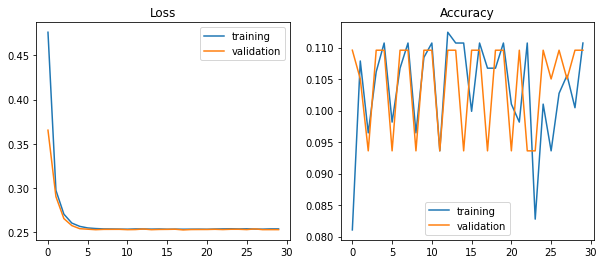

In [94]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.epoch, history.history['loss'], label='training')
plt.plot(history.epoch, history.history['val_loss'], label='validation')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.legend(loc='best')

plt.show()

In [95]:
train_scores = model.evaluate(x_train_t_tfidf, y_train)

69/69 [==============================] - 2s 28ms/step - loss: 0.2533 - accuracy: 0.1105


In [96]:
train_scores

[0.25327268242836, 0.11050228029489517]

In [97]:
test_scores = model.evaluate(x_test_t_tfidf, y_test)

30/30 [==============================] - 1s 29ms/step - loss: 0.2533 - accuracy: 0.1097


In [98]:
test_scores

[0.253313809633255, 0.10969115793704987]

In [99]:
maxlen = max([x_train_l_tfidf[i].data.shape[0] for i in range(x_train_l_tfidf.shape[0])])
maxlen = 500

In [100]:
x_train_l_tfidf = sequence.pad_sequences([x.data for x in x_train_l_tfidf], maxlen=maxlen, dtype='float16')
x_test_l_tfidf = sequence.pad_sequences([x.data for x in x_test_l_tfidf], maxlen=maxlen, dtype='float16')

In [101]:
vocabulary_size = len(count_vectorizer_l.vocabulary_)

In [102]:
model = Sequential([Embedding(vocabulary_size, 128, input_length=maxlen), 
                    Conv1D(48, 10, activation='sigmoid'), 
                    MaxPool1D(pool_size=48),
                    # Conv1D(48, 7, activation='sigmoid'), 
                    # MaxPool1D(pool_size=5),
                    GlobalMaxPool1D(),
                    Flatten(),
                    Dense(14, activation='softmax')
                   ]) 

In [103]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 128)          5555712   
                                                                 
 conv1d_2 (Conv1D)           (None, 491, 48)           61488     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 10, 48)           0         
 1D)                                                             
                                                                 
 global_max_pooling1d_1 (Glo  (None, 48)               0         
 balMaxPooling1D)                                                
                                                                 
 flatten_1 (Flatten)         (None, 48)                0         
                                                                 
 dense_2 (Dense)             (None, 14)               

In [104]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=0.005), metrics=['accuracy'])

In [105]:
history = model.fit(x_train_l_tfidf, y_train, epochs=30, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/30
14/14 [==============================] - 12s 838ms/step - loss: 0.3828 - accuracy: 0.0651 - val_loss: 0.2631 - val_accuracy: 0.0457
Epoch 2/30
14/14 [==============================] - 12s 849ms/step - loss: 0.2581 - accuracy: 0.0925 - val_loss: 0.2571 - val_accuracy: 0.0936
Epoch 3/30
14/14 [==============================] - 12s 840ms/step - loss: 0.2554 - accuracy: 0.1027 - val_loss: 0.2538 - val_accuracy: 0.1096
Epoch 4/30
14/14 [==============================] - 12s 862ms/step - loss: 0.2544 - accuracy: 0.1107 - val_loss: 0.2528 - val_accuracy: 0.1096
Epoch 5/30
14/14 [==============================] - 12s 822ms/step - loss: 0.2535 - accuracy: 0.0982 - val_loss: 0.2531 - val_accuracy: 0.1096
Epoch 6/30
14/14 [==============================] - 11s 815ms/step - loss: 0.2535 - accuracy: 0.1107 - val_loss: 0.2534 - val_accuracy: 0.1096
Epoch 7/30
14/14 [==============================] - 12s 847ms/step - loss: 0.2535 - accuracy: 0.0987 - val_loss: 0.2531 - val_accuracy: 0.1096

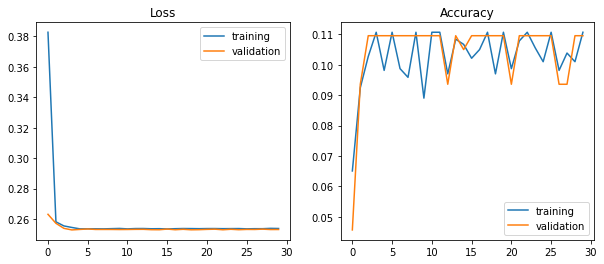

In [106]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.epoch, history.history['loss'], label='training')
plt.plot(history.epoch, history.history['val_loss'], label='validation')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.legend(loc='best')

plt.show()

In [107]:
train_scores = model.evaluate(x_train_l_tfidf, y_train)

69/69 [==============================] - 3s 43ms/step - loss: 0.2532 - accuracy: 0.1105


In [108]:
train_scores

[0.25320276618003845, 0.11050228029489517]

In [109]:
test_scores = model.evaluate(x_test_l_tfidf, y_test)

30/30 [==============================] - 1s 43ms/step - loss: 0.2533 - accuracy: 0.1097


In [110]:
test_scores

[0.25326845049858093, 0.10969115793704987]

In [111]:
maxlen = max([x_train_s_tfidf[i].data.shape[0] for i in range(x_train_s_tfidf.shape[0])])
maxlen  = 500

In [112]:
x_train_s_tfidf = sequence.pad_sequences([x.data for x in x_train_s_tfidf], maxlen=maxlen, dtype='float16')
x_test_s_tfidf = sequence.pad_sequences([x.data for x in x_test_s_tfidf], maxlen=maxlen, dtype='float16')

In [113]:
vocabulary_size = len(count_vectorizer_s.vocabulary_)

In [114]:
model = Sequential([Embedding(vocabulary_size, 128, input_length=maxlen), 
                    Conv1D(48, 10, activation='sigmoid'), 
                    MaxPool1D(pool_size=48),
                    # Conv1D(48, 7, activation='sigmoid'), 
                    # MaxPool1D(pool_size=5),
                    GlobalMaxPool1D(),
                    Flatten(),
                    Dense(14, activation='softmax')
                   ]) 

In [115]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 128)          3056896   
                                                                 
 conv1d_3 (Conv1D)           (None, 491, 48)           61488     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 10, 48)           0         
 1D)                                                             
                                                                 
 global_max_pooling1d_2 (Glo  (None, 48)               0         
 balMaxPooling1D)                                                
                                                                 
 flatten_2 (Flatten)         (None, 48)                0         
                                                                 
 dense_3 (Dense)             (None, 14)               

In [116]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=0.005), metrics=['accuracy'])

In [117]:
history = model.fit(x_train_s_tfidf, y_train, epochs=30, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/30
14/14 [==============================] - 12s 805ms/step - loss: 0.3640 - accuracy: 0.0759 - val_loss: 0.2574 - val_accuracy: 0.0982
Epoch 2/30
14/14 [==============================] - 12s 890ms/step - loss: 0.2579 - accuracy: 0.1153 - val_loss: 0.2578 - val_accuracy: 0.1096
Epoch 3/30
14/14 [==============================] - 11s 781ms/step - loss: 0.2564 - accuracy: 0.1022 - val_loss: 0.2539 - val_accuracy: 0.0936
Epoch 4/30
14/14 [==============================] - 11s 780ms/step - loss: 0.2537 - accuracy: 0.1010 - val_loss: 0.2533 - val_accuracy: 0.1096
Epoch 5/30
14/14 [==============================] - 11s 778ms/step - loss: 0.2536 - accuracy: 0.1107 - val_loss: 0.2531 - val_accuracy: 0.1096
Epoch 6/30
14/14 [==============================] - 11s 799ms/step - loss: 0.2534 - accuracy: 0.1056 - val_loss: 0.2531 - val_accuracy: 0.1096
Epoch 7/30
14/14 [==============================] - 11s 801ms/step - loss: 0.2536 - accuracy: 0.1107 - val_loss: 0.2529 - val_accuracy: 0.1096

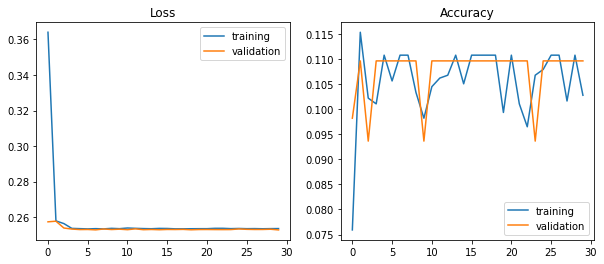

In [118]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.epoch, history.history['loss'], label='training')
plt.plot(history.epoch, history.history['val_loss'], label='validation')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.legend(loc='best')

plt.show()

In [119]:
train_scores = model.evaluate(x_train_s_tfidf, y_train)

69/69 [==============================] - 3s 47ms/step - loss: 0.2531 - accuracy: 0.1105


In [120]:
train_scores

[0.25314831733703613, 0.11050228029489517]

In [121]:
test_scores = model.evaluate(x_test_s_tfidf, y_test)

30/30 [==============================] - 1s 46ms/step - loss: 0.2532 - accuracy: 0.1097


In [122]:
test_scores

[0.25320175290107727, 0.10969115793704987]

In [123]:
x_train = x_train.apply(lambda x: [word_index[word] for word in x.split(' ') if word in word_index])
x_test = x_test.apply(lambda x: [word_index[word] for word in x.split(' ') if word in word_index])

In [124]:
x_train

3666    [921, 171, 271, 15, 724, 14762, 8312, 3533, 15...
1123    [8316, 3, 2469, 3, 73, 20, 46, 5374, 2470, 9, ...
2772    [39, 202, 7010, 2472, 8, 305, 4, 442, 427, 147...
928     [83, 2890, 672, 168, 465, 713, 922, 292, 84, 8...
2863    [14773, 293, 7011, 643, 679, 961, 2245, 38, 44...
                              ...                        
1927    [1726, 2869, 60, 7, 1395, 349, 31490, 31491, 4...
861     [28, 21, 2152, 803, 415, 198, 1020, 405, 21, 1...
2123    [39, 202, 539, 31507, 2, 1602, 9266, 94, 10, 6...
835     [21, 3254, 3365, 927, 72, 488, 14156, 254, 281...
1047    [1, 231, 3, 45, 73, 14761, 379, 14, 231, 378, ...
Name: clear text, Length: 2190, dtype: object

In [125]:
maxlen = 500
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [141]:
model = Sequential([Embedding(voc_size, dimension, input_length=maxlen, trainable=False, weights=[coef_matrix]), 
                    Conv1D(48, 14, activation='sigmoid'), 
                    MaxPool1D(pool_size=48),
                    # Conv1D(48, 7, activation='sigmoid'), 
                    # MaxPool1D(pool_size=5),
                    GlobalMaxPool1D(),
                    Flatten(),
                    Dense(14, activation='softmax')
                   ]) 

In [142]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 500, 100)          40000000  
                                                                 
 conv1d_8 (Conv1D)           (None, 487, 48)           67248     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 10, 48)           0         
 1D)                                                             
                                                                 
 global_max_pooling1d_6 (Glo  (None, 48)               0         
 balMaxPooling1D)                                                
                                                                 
 flatten_6 (Flatten)         (None, 48)                0         
                                                                 
 dense_7 (Dense)             (None, 14)               

In [143]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=0.005), metrics=['accuracy'])

In [144]:
import tensorflow as tf
with tf.device('/device:GPU:0'):
  history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/30
14/14 [==============================] - 10s 634ms/step - loss: 0.4030 - accuracy: 0.0502 - val_loss: 0.2645 - val_accuracy: 0.0502
Epoch 2/30
14/14 [==============================] - 8s 562ms/step - loss: 0.2522 - accuracy: 0.1170 - val_loss: 0.2486 - val_accuracy: 0.0959
Epoch 3/30
14/14 [==============================] - 8s 574ms/step - loss: 0.2431 - accuracy: 0.2654 - val_loss: 0.2397 - val_accuracy: 0.3288
Epoch 4/30
14/14 [==============================] - 8s 586ms/step - loss: 0.2352 - accuracy: 0.3116 - val_loss: 0.2332 - val_accuracy: 0.2991
Epoch 5/30
14/14 [==============================] - 8s 564ms/step - loss: 0.2283 - accuracy: 0.3465 - val_loss: 0.2268 - val_accuracy: 0.3836
Epoch 6/30
14/14 [==============================] - 8s 582ms/step - loss: 0.2202 - accuracy: 0.4281 - val_loss: 0.2190 - val_accuracy: 0.4315
Epoch 7/30
14/14 [==============================] - 8s 547ms/step - loss: 0.2109 - accuracy: 0.5257 - val_loss: 0.2110 - val_accuracy: 0.5502
Epoch

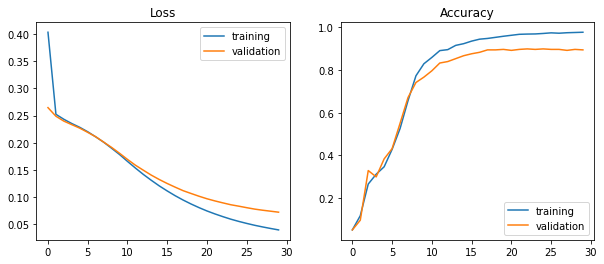

In [145]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.epoch, history.history['loss'], label='training')
plt.plot(history.epoch, history.history['val_loss'], label='validation')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.legend(loc='best')

plt.show()

In [146]:
train_scores = model.evaluate(x_train, y_train)

69/69 [==============================] - 3s 49ms/step - loss: 0.0450 - accuracy: 0.9621


In [147]:
train_scores

[0.045005735009908676, 0.9621004462242126]

In [148]:
test_scores = model.evaluate(x_test, y_test)

30/30 [==============================] - 2s 49ms/step - loss: 0.0724 - accuracy: 0.8818


In [149]:
test_scores

[0.07241474092006683, 0.8817891478538513]